# Physics of Stellar Atmosphere & Equations

* The most important effect is the absorption of radiation from deeper and hotter layers of a star by cooler gas in layers further outside. The outermost layers which shape the spectrum of the visible radiation of a star are called **stellar atmosphere**. This field of astrophysics seeks to understand the physical processes and properties of these layers, such as their temperature, density, chemical composition, and the way they emit light and other forms of radiation.
* Although hydrogen is the most abundant constituent, other atoms and ions play an important role too, especially in stars of low effective temperature.
* By analyzing the spectra of light emitted from a star's atmosphere, scientists can infer various properties, such as chemical composition and temperature. Each element in a star's atmosphere absorbs and emits light at characteristic wavelengths, creating a unique spectral fingerprint.
* As a consequence, modeling the transfer of radiation in stellar atmospheres is extremely complex and requires numerical computations using databases for a huge number of line transitions for a variety of atoms, ions, and molecules.
* An important source of absorption in stellar atmospheres are transitions from lower to higher energy levels (also known as bound-bound transitions). For hydrogen, the energy difference between levels defined by the principal quantum numbers $n_{1}$ and $n_{2} > n_{1}$ is given:
> $\Delta E = -13.6eV \times (\frac{1}{n_{2}} - \frac{1}{n_{1}})$

or,

  * Substituting the energy levels and simplifying, the energy difference becomes:

  > $\Delta E = R_H \cdot h \cdot c \left( \frac{1}{n_1^2} - \frac{1}{n_2^2} \right)$

  where:

  $R_H$: the Rydberg constant for hydrogen, approximately ($1.097 \times 10^{7} m^{-1}$)

  $h$: the Planck's constant

  $c$: the speed of light

  This formula is fundamental in understanding the spectral lines of hydrogen, particularly in the visible, ultraviolet, and infrared regions. These spectral lines, known as the Lyman, Balmer, and Paschen series (among others), are due to electronic transitions between different energy levels in the hydrogen atom.

* A photon can be absorbed if its energy matches the energy difference between the two levels:

  > $\Delta E = \frac{hc}{\lambda}$

  where:

  $h$: the Planck's constant

  $c$: the speed of light in vacuum

  $\lambda$: the wavelength of the photon
    * Electrons in an atom can only occupy certain energy levels. The difference in energy between these levels is fixed. If the photon's energy exactly matches the energy gap between two electron energy levels in the atom, the photon can be absorbed. Upon absorbing the photon, the electron transitions from the lower energy level to the higher energy level. The energy gained by the electron is equal to the energy of the absorbed photon, ensuring conservation of energy.
    * For a hydrogen atom in the ground state, $n_{1} = 1$, the wavelength associated with the transition to the next higher level, $n_{2} = 2$, is $\lambda = 121.6 nm$ and even shorter for higher levels. Emission or absorption lines at these wavelengths, which are all ultraviolet, are called the **Lyman series**. One might expect that the Lyman series can be seen in the light emitted by hot stars. However, the fraction of hydrogen atoms in the ground state rapidly decreases with increasing temperature.  It turns out that transitions from the first excited state, $n_{1} = 2$, to levels $n_{2} > 2$ give rise to prominent absorption lines in stellar spectra, which are known as **Balmer lines**.

In [1]:
def PhotonEnergy(wavelength:int or float)->int or float:
  """
  Calculate the energy of a photon based on its wavelength.

  Parameters:
  wavelength (float): Wavelength of the photon in meters.

  Returns:
  float: Energy of the photon in Joules.
  """
  planckConstant = 6.62607015e-34  # Planck's constant (Joule second)
  speedofLight = 3.0e8  # Speed of light in vacuum (meters per second)
  energy = (planckConstant*speedofLight)/wavelength
  return energy

In [2]:
wavelength = 500e-9 # 500 nm in meters

In [3]:
photonEnergyResult = PhotonEnergy(wavelength)
print(f"The energy of a photon with a wavelength of 500 nm: {photonEnergyResult} Joules")

The energy of a photon with a wavelength of 500 nm: 3.9756420899999997e-19 Joules


In [4]:
def HydrogenEnergyDifference(n1:int,n2:int)->int or float:
  """
    Calculate the energy difference between two levels in a hydrogen atom
    using the Rydberg formula.

    Parameters:
    n1 (int): Principal quantum number of the lower energy level.
    n2 (int): Principal quantum number of the higher energy level.

    Returns:
    float: Energy difference in Joules.
  """
  rydbergConstant = 2.1798723611035e-18 # Rydberg constant for hydrogen in Joules
  energyDifference = rydbergConstant*((1/n1**2)-(1/n2**2))
  return energyDifference

In [5]:
n1 = 1 # n1 for the first energy level
n2 = 2 # n2 for the second energy level

In [6]:
energyDiff = HydrogenEnergyDifference(n1,n2)
print(f"The energy difference between the first and second energy levels in a hydrogen atom: {energyDiff} Joules")

The energy difference between the first and second energy levels in a hydrogen atom: 1.634904270827625e-18 Joules


**This energy difference is significant because it corresponds to the energy absorbed or emitted when an electron transitions between these two levels.**

# Thermal Excitation

* Thermal excitation refers to the process by which atoms or molecules in a substance absorb thermal energy, leading to an increase in their internal energy states. In the context of astrophysics, particularly in stellar atmospheres, thermal excitation causes electrons in atoms to move to higher energy levels.
  * At higher temperatures, the kinetic energy of particles increases.
  * This increased energy can be absorbed by electrons in atoms, causing them to jump to higher energy levels (excited states).
  * The probability of an electron being in a certain energy state at a given temperature is described by the Boltzmann distribution.
* Collisions between atoms excite some of them into a higher energy state, while others lose energy. The balance between these processes is described by the Boltzmann distribution. If the gas is in thermal equilibrium, the ratio of the occupation numbers, $N_2$ and $N_1$, of levels, $n_2$ and $n_1$, respectively, is given by:
> $\frac{N_2}{N_1} = (\frac{g_2}{g_1}) \times e^{-(E_2-E_1)/kT}$

where:

$g_1$ and $g_2$: the statistical weights of the energy levels (i.e. the number of possible quantum states with the same energy)

$T$: the temperature of the gas

  * For the hydrogen atom, the "$n$th" energy level is degenerate with weight $g_n = 2n^{2}$ (the energy of a state is independent of the spin and the angular momentum quantum numbers).

In [7]:
import numpy as np
from scipy.constants import h,c,k,physical_constants,m_e
from scipy.constants import sigma # Stefan-Boltzmann constant
from astropy.constants import R_sun,L_sun
from astropy.constants import sigma_sb # Stefan-Boltzmann constant
import astropy.units as u
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator
plt.style.use("dark_background")
%matplotlib inline

In [8]:
rydbergConstant = physical_constants["Rydberg constant times hc in J"][0] # chi

In [9]:
print(f"Mass of electron: {m_e}")

Mass of electron: 9.1093837015e-31


In [10]:
print(f"Rydberg Constant: {rydbergConstant}")

Rydberg Constant: 2.1798723611035e-18


In [11]:
n1,n2 = 1,2

In [12]:
def DefineStellarParameters(*args)->dict:
  """
  auxiliary function to create a dictionary of stellar parameters in SI units
  """
  return {
      "Radius":args[0].to(u.m),
      "Temperature":args[1].to(u.K)
  }

In [13]:
stars = {
    "Bernard Star":DefineStellarParameters(0.196*R_sun,3.13e3*u.K),
    "Sirius A":DefineStellarParameters(1.711*R_sun,9.94e3*u.K),
    "Sirius B":DefineStellarParameters(5.8e3*u.km,2.48e4*u.K),
    "Arcturus":DefineStellarParameters(25.4*R_sun,4.29e3*u.K),
    "Betelgeuse":DefineStellarParameters(6.4e8*u.km,3.59e3*u.K)
}

In [14]:
stars

{'Bernard Star': {'Radius': <Quantity 1.363572e+08 m>,
  'Temperature': <Quantity 3130. K>},
 'Sirius A': {'Radius': <Quantity 1.1903427e+09 m>,
  'Temperature': <Quantity 9940. K>},
 'Sirius B': {'Radius': <Quantity 5800000. m>,
  'Temperature': <Quantity 24800. K>},
 'Arcturus': {'Radius': <Quantity 1.767078e+10 m>,
  'Temperature': <Quantity 4290. K>},
 'Betelgeuse': {'Radius': <Quantity 6.4e+11 m>,
  'Temperature': <Quantity 3590. K>}}

In [15]:
temperatureSample = np.zeros(len(stars)+1)

In [16]:
for index,key in enumerate(stars):
  temperatureSample[index] = stars[key]["Temperature"].value
# add effective temperature of Sun as last element
temperatureSample[-1] = 5778
temperatureSample = np.sort(temperatureSample)

In [17]:
print(f"Temperature [Kelvin]  N2/N1: ")
for temp in temperatureSample:
  print("{:5.0f}               {:.3e}".format(temp,(n2/n1)**2*np.exp(rydbergConstant*((1/n2**2)-(1/n1**2))/(k*temp))))

Temperature [Kelvin]  N2/N1: 
 3130               1.485e-16
 3590               1.892e-14
 4290               4.115e-12
 5778               5.030e-09
 9940               2.681e-05
24800               3.376e-02


**While the fraction of hydrogen in the first excited state is very low for cooler stars and the Sun, it increases rapidly toward the hot end.**

* Transitions from the first excited state thus should become ever more important as the effective temperature increases. However, this is not what is observed: the strongest Balmer absorption lines are seen in the spectra of stars of spectral class A, with effective temperatures below 10000 K.

# Ionization

* Thermal ionization occurs when atoms absorb enough thermal energy that electrons are completely removed from the atom, creating ions. This process is particularly significant in hot stellar interiors and atmospheres.
 * When the thermal energy surpasses the ionization energy of an electron in an atom, the electron can be ejected, leading to ionization.
 * The degree of ionization in a gas of a certain temperature and pressure can be predicted by the Saha equation. The Saha equation relates the ionization state of an element in thermal equilibrium:
 > $\frac{N_{i+1} N_e}{N_i} = \frac{2}{N_Q} \left( \frac{2\pi m_e kT}{h^2} \right)^{3/2} e^{-\frac{\chi_i}{kT}}$

 where:

 $N_{i+1}$, $N_{i}$, $N_{e}$: the number densities of the ionized state, neutral state, and free electrons, respectively

 $N_Q$: the total number density of atoms and ions

 $m_e$: the electron mass

 $X_i$: the ionization energy of the level

 $h$: the Planck's constant

 * Similar to the Boltzmann equation, the ratio ($\frac{N_{i+1} N_e}{N_i}$) is dominated by the exponential factor $e^{-x/kT}$ for low temperature.
 * If there are more free electrons per unit volume, recombinations will become more frequent and the number of ions decreases.


In [18]:
def IonizedHydrogen(temperature:int or float,electronPressure:int or float)->int or float:
  """
  computes fraction of ionized hydrogen, using the Saha equation

  temperature: temperature in K
  electronPressure: electron pressure in Pa

  returns: HII (Ionized Hydrogen) fraction
  """
  thermalElectron = k*temperature
  hii = (thermalElectron/electronPressure)*(2*np.pi*m_e*thermalElectron/h**2)**(3/2)*np.exp(-rydbergConstant/thermalElectron)
  return hii

In [19]:
def IonizedHydrogenRatio(electronNumberDensity:int or float,temperature:int or float,ionizationEnergy:int or float,g0:int or float,g1:int or float)->int or float:
  """
    Calculate the ionization ratio using the Saha equation.

    Parameters:
    electronNumberDensity (float): Electron number density (per cubic meter).
    temperature (float): Temperature in Kelvin.
    ionizationEnergy (float): Ionization energy (Joules).
    g0 (float): Statistical weight (degeneracy) of the neutral state.
    g1 (float): Statistical weight (degeneracy) of the ionized state.

    Returns:
    float: Ionization ratio (fraction of ionized atoms).
  """
  boltzmann = 1.380649e-23  # Boltzmann constant (Joule per Kelvin)
  planck = 6.62607015e-34  # Planck's constant (Joule second)
  me = 9.10938356e-31  # Electron mass (kg)
  ratio = (2/electronNumberDensity)*((2*np.pi*me*boltzmann*temperature)/(planck**2))**(3/2)*np.exp(-ionizationEnergy/(boltzmann*temperature))*(g1/g0)
  return ratio

In [20]:
# Assuming a temperature of about 6000 Kelvin and electron density in the Sun's atmosphere
temperatureSun = 6000  # Temperature in Kelvin
electronNumberDensitySun = 1e16  # Electron number density (per cubic meter)
chiHydrogen = 2.18e-18  # Ionization energy of hydrogen (Joules)
g0Hydrogen = 2 # Statistical weight of neutral hydrogen
g1Hydrogen = 1 # Statistical weight of neutral hydrogen

In [21]:
ionizationRatio = IonizedHydrogenRatio(electronNumberDensitySun,temperatureSun,chiHydrogen,g0Hydrogen,g1Hydrogen)
print(f"Ionization ratio of hydrogen in the Sun's atmosphere: {ionizationRatio} electron density of per cubic meter")

Ionization ratio of hydrogen in the Sun's atmosphere: 0.41796373342770726 electron density of per cubic meter


In [22]:
# Temperature range for the plot (3000 K to 15000 K)
temperatureRange = np.linspace(3000,15000,500)

In [23]:
ionizationStates = [IonizedHydrogenRatio(electronNumberDensitySun,temp,chiHydrogen,g0Hydrogen,g1Hydrogen) for temp in temperatureRange]

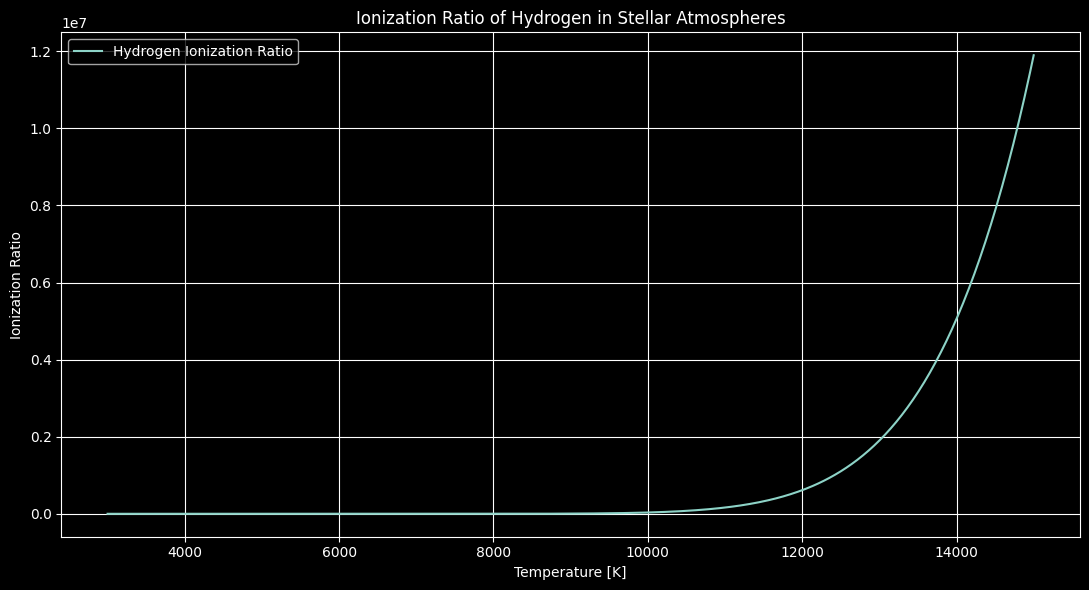

In [24]:
plt.figure(figsize=(11,6))
plt.title("Ionization Ratio of Hydrogen in Stellar Atmospheres")
plt.plot(temperatureRange,ionizationStates,label="Hydrogen Ionization Ratio")
plt.xlabel("Temperature [K]")
plt.ylabel("Ionization Ratio")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**The temperature of 6000 Kelvin and the high electron density are typical for the Sun's atmosphere.**

**The statistical weights of neutral (g0) and ionized (g1) hydrogen reflect the number of available quantum states.**

**The plot is crucial for understanding stellar physics. The ionization state of hydrogen (the most abundant element in stars) significantly affects the light absorption and emission characteristics of stars. As the temperature increases, the ionization ratio also increases. This indicates that higher temperatures lead to a greater proportion of hydrogen atoms being ionized.**

In [25]:
electronPressure = 20 # electron pressure in Pa
temperatureMin,temperatureMax = 5000,25000 # temperature in K
temperatureRange = np.arange(temperatureMin,temperatureMax, 100.0)

In [26]:
# fraction of HI in first excited state
hi2Fraction = 4*np.exp(-0.75*rydbergConstant/(k*temperatureRange))
#print(f"Fraction: {hi2Fraction}")

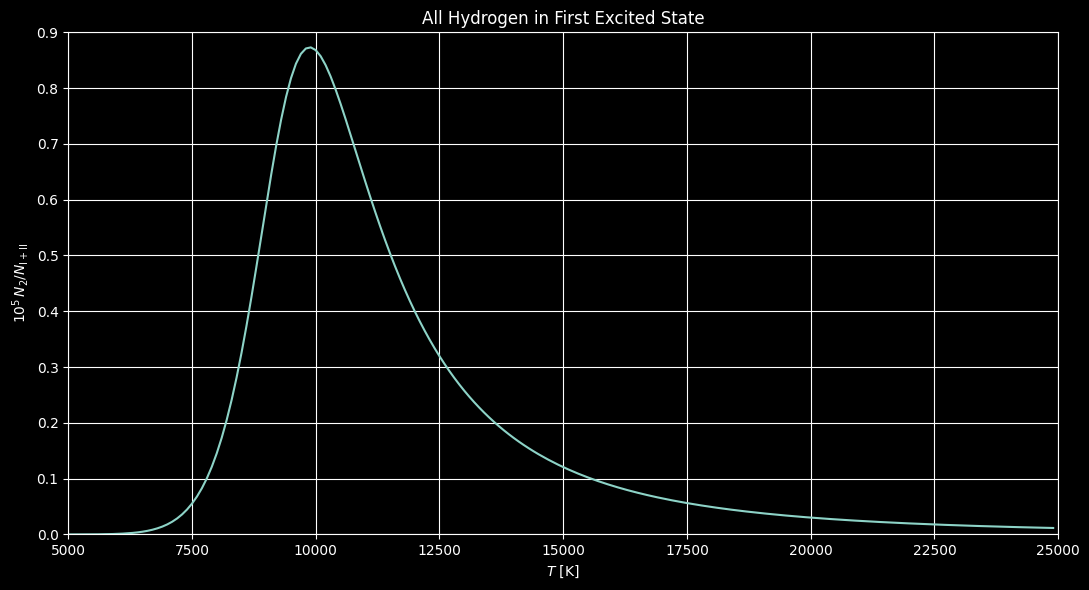

In [27]:
plt.figure(figsize=(11,6),dpi=100)
plt.title("All Hydrogen in First Excited State")
plt.plot(temperatureRange, 1e5 * hi2Fraction / ((1 + hi2Fraction) * (1 + IonizedHydrogen(temperatureRange, electronPressure))))
plt.xlim(temperatureMin,temperatureMax)
plt.xlabel("$T$ [K]")
plt.ylim(0,0.9)
plt.ylabel("$10^5\,N_2/N_{\mathrm{I+II}}$")
plt.tight_layout()
plt.grid(True)
plt.show()

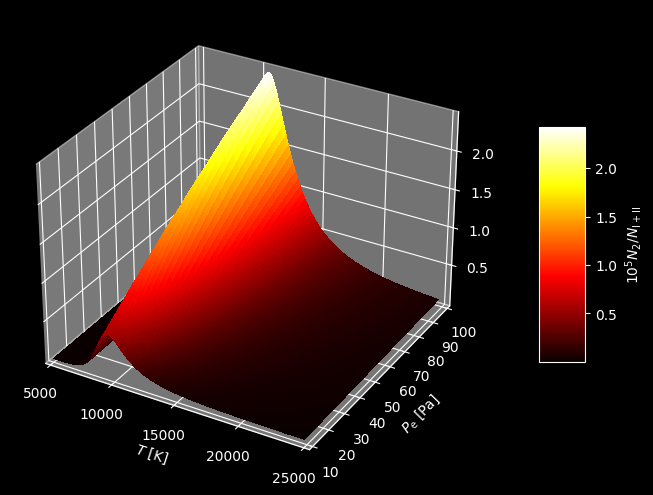

In [28]:
figure = plt.figure(figsize=(12,5),dpi=100)
ax = plt.axes(projection="3d")
pressureMin,pressureMax = 10,100
temperature,pressure = np.meshgrid(
    np.arange(temperatureMin,temperatureMax,200.0),
    np.arange(pressureMin,pressureMax,1.0)
)
hi2Fraction = 4*np.exp(-0.75*rydbergConstant/(k*temperature))
surface = ax.plot_surface(
    temperature,
    pressure,
    1e5*hi2Fraction/((1+hi2Fraction)*(1+IonizedHydrogen(temperature,pressure))),
    rcount=100,
    ccount=100,
    cmap="hot",
    antialiased=False
)
ax.set_xlim(temperatureMin,temperatureMax)
ax.set_xlabel("$T$ [K]")
ax.xaxis.set_major_locator(LinearLocator(5))
ax.set_ylim(pressureMin,pressureMax)
ax.set_ylabel("$P_{\mathrm{e}}$ [Pa]")
colorBar = figure.colorbar(surface,shrink=0.5,aspect=5)
colorBar.ax.set_ylabel("$10^5 N_2/N_{\mathrm{I+II}}$")
plt.tight_layout()
plt.show()

**It turns out that the maximal fraction of excited hydrogen increases with electron pressure (this is expected because ionization is reduced), but the location of the peak is shifted only slightly from lower to higher temperature.**

# The Balmer Jump

*The Balmer Jump, often encountered in astronomy, refers to a specific feature in the spectrum of stars, particularly hot stars. It's a phenomenon observed in the electromagnetic spectrum and is closely related to the Balmer series of hydrogen.
* Balmer lines result from absorbed photons that lift electrons from the first excited state of hydrogen, $n=2$, to higher energy levels, $n>2$. This series falls largely in the visible spectrum.
* The Balmer Jump occurs at the limit of the Balmer series, around a wavelength of 364.6 nm, in the ultraviolet part of the spectrum. This is where the spectral continuum abruptly changes. Below this wavelength, electrons are being ionized (moved from the n=2 level to a continuum state), causing a discontinuity or 'jump' in the absorption feature of the spectrum.
* In the spectra of stars, this jump can be used to determine the temperature and composition of the star's atmosphere. The size of the Balmer Jump decreases as the temperature of the star increases.
*The formula for the wavelength at which the Balmer Jump occurs is derived from the Rydberg formula for the Balmer series:
> $\lambda = \frac{hc}{R_H \left( \frac{1}{2^2} - \frac{1}{n^2} \right)}$

where:

$\lambda$: the wavelength of the emitted light

$h$: the Planck's constant

$c$: the speed of light

$R_H$: the Rydberg constant for hydrogen

$n$: the principal quantum number (for Balmer series, $n>2$)

The Balmer Jump specifically occurs at the limit of this series, which is when $n$ approaches infinity. So, the wavelength for the Balmer $\lambda_{jump}$:

> $\lambda_{\text{jump}} = \frac{hc}{R_H \left( \frac{1}{2^2} - \frac{1}{\infty^2} \right) } = \frac{hc}{R_H \times \frac{3}{4}}$

Simplifying, we get the wavelength value where the Balmer Jump occurs $\lambda_{\text{jump}} \approx 364.6 \, \text{nm}$

* If a photon is sufficiently energetic, it can even ionize a hydrogen atom.
* The condition for ionization from the state $n=2$ is, corresponding maximal wavelength is 364.7 nm:
> $\frac{hc}{\lambda} \geq X_2 = \frac{13.6eV}{2^2} = 3.40eV$

This is the energy required to ionize an electron from the second energy level of hydrogen.

where:

$13.6eV$:  is the ionization energy of a hydrogen atom from its ground state (n=1).

$X_2$: represents the ionization energy from the n=2 state. For hydrogen, the ionization energy from any state "n" is given by: $\frac{13.6eV}{n^2}$

Like the higher Balmer lines, it is in the ultraviolet part of the spectrum. Since ionizing photons can have any energy above $X_2$, ionization will result in a drop in the radiative flux at wavelengths shorter than 364.7 nm rather than a line. This is called the **Balmer jump**.

* The inequality $\frac{hc}{\lambda} \geq 3.40eV$ states that the energy of the photon must be greater than or equal to 3.40 eV to ionize an electron from the n=2 state of the hydrogen atom. In simpler terms, a photon with a wavelength short enough (and thus energy high enough) can provide the necessary energy to ionize an electron from this specific energy level of hydrogen.

* To find the fraction of photons capable of ionizing hydrogen, we need to consider the part of the star's spectrum with wavelengths shorter than 91.2 nm (since shorter wavelengths mean higher energy). This involves integrating Planck's formula from 0 to 91.2 nm and comparing this to the total radiation. By comparing the integrated power in the ionizing range (0 to 91.2 nm) to the total integrated power across all wavelengths, we can estimate the fraction of ionizing photons.

> $\text{Fraction of ionizing photons} = \frac{\int_0^{91.2\, \text{nm}} B(\lambda, T) \, d\lambda}{\int_0^{\infty} B(\lambda, T) \, d\lambda}$

* To estimate the fraction of photons of sufficient energy to ionize hydrogen for a star of given effective temperature, let us assume that the incoming radiation is black body radiation. From the Planck spectrum, we can infer the flux below a given wavelength:
> $F_{\lambda} \leq \lambda_{0} = (\pi) \times \int_0^{\lambda_{0}} \frac{2hc^{2}}{\lambda^{5}} \frac{1}{\exp(hc/\lambda k T)-1}d \lambda$

In [31]:
def BalmerJump()->int or float:
  wavelengthJump = 364.6e-9  # Balmer Jump wavelength in meters
  energyBefore = h*c/(wavelengthJump + 1e-9) # Just before the jump
  energyAfter = h*c/(wavelengthJump - 1e-9) # Just after the jump
  return energyBefore,energyAfter

In [32]:
energyBefore,energyAfter = BalmerJump()
print(f"Energy just before the Balmer Jump: {energyBefore} Joules")
print(f"Energy just after the Balmer Jump: {energyAfter} Joules")

Energy just before the Balmer Jump: 5.433385823711511e-19 Joules
Energy just after the Balmer Jump: 5.463272434402994e-19 Joules


In [33]:
def EnergyAtWavelength(wavelength:int or float)->int or float:
  wavelengthM = wavelength*1e-9 # Convert nm to meters
  energy = h*c/wavelengthM # Energy in Joules
  return energy

In [34]:
wavelengthBeforeJump = 364.7 # nm, example value
wavelengthAfterJump = 364.5  # nm, example value

In [35]:
energyBefore = EnergyAtWavelength(wavelengthBeforeJump)
energyAfter = EnergyAtWavelength(wavelengthAfterJump)
print(f"Energy at {wavelengthBeforeJump} nm: {energyBefore} Joules")
print(f"Energy at {wavelengthAfterJump} nm: {energyAfter} Joules")

Energy at 364.7 nm: 5.44679423402503e-19 Joules
Energy at 364.5 nm: 5.449782872836567e-19 Joules


## Example

**Aldebaran, also known as Alpha Tauri, is an orange giant star. It's cooler than the Sun, with a surface temperature around 3,900 K. Its spectrum is rich in absorption lines, including those of the Balmer series of hydrogen.**

In [36]:
# Hypothetical function to load spectral data for Aldebaran
def LoadAldebaranData()->dict:
  # In a real scenario, this function would load data from a file or database
  # For this example, it returns hypothetical values
  return {
      # in nm
      "wavelengths": [364.5,364.6,364.7],
       # arbitrary units
      "intensities": [450,400,500]
  }

In [41]:
def FindBalmerJump(spectralData:dict,threshold:int or float)->None:
  wavelengths = spectralData["wavelengths"]
  intensities = spectralData["intensities"]
  for index in range(len(wavelengths)-1):
    if abs(intensities[index]-intensities[index+1])>threshold:
      print(f"Balmer Jump detected around {wavelengths[index]} nm")
      break
  else:
    print("No significant Balmer Jump detected.")

In [42]:
aldebaranData = LoadAldebaranData()
threshold = 50
FindBalmerJump(aldebaranData,threshold)

Balmer Jump detected around 364.6 nm
